# $$Elaborato$$ $$d'esame$$
## $Introduzione$
*La sonda pinella ha fatto la cacca analizzando giovannino per 3 mesi, fornendo dati importati per lo studio di pippo franco*
## $Obiettivo$
*Analizzando il primo data release dell'.... verranno presi in considerazioni le misure del logaritmo della massa???, del redshift e infine della distanza normalizzata tra ......,*





# $Spiegazione$ $ed$ $illustrazione$ $del$ $codice$
<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>
$\text{Per raggiunger il fine sopra menzionato è stato scritto un programma in linguaggio python.}$
$\text{Il codice verrà illustrato nel modo seguente: sopra ogni cella contenente un blocco di codice, sarà  presente}$
$\text{una breve spiegazione del suo ruolo e la sua struttura, per differenziare le discussioni dei risultati dalle}$
$\text{spiegazioni del codice, queste ultime verrano evidenziate nei box gialli. Inoltre all'interno del codice saranno }$
$\text{presenti ulteriori commenti.}$


</p>
</div>



### $Primo$ $blocco$ $di$ $codice$

<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>
$\text{Vengono importati i moduli necessari per la costruzione di tutto il programma. Successivamente viene}$
$\text{semplicemente letto il file catalog.csv contenente i dati del primo release di eRosita, estraendone le colonne}$ 
    $\text{contenenti le misure di redshift, della massa e offset.}$

</p>
</div>


In [37]:
#importo tutti i moduli utili per il codice seguente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Letura dei dati
file_path = "catalog.csv"
df = pd.read_csv(file_path)

#Selezino le colonne relative ai dati di interesse 
z = df["BEST_Z"]
logM = df["logM500"]
offset = df["BCG_offset_R500"]

### $Secondo$ $blocco$ $di$ $codice$

<div style="border-left: 4px solid #FFC107; padding: 10px; background:#FFF9E6;">
<p>
$\text{Questa parte del programma plotta gli istogrammi dei diversi valori d'interesse. Viene infatti impostata una }$
$\text{figura che mi consente di plottare i tre grafici uno affianco all'altro e poi usata la funzione .hist di }$ 
    $\text{matplotlib per creare gli istogrammi. }$
$\text{Vogliamo poi calcolare i valori di massimo e minimo, deviazione standard, medie e quartili.}$
$\text{Questo viene fatto sfruttando la funzione .describe di seaborn, che restituisce una series di pandas. }$
    $\text{Per la presentazione grafica relativamente estetica viene usato del codice HTML. Tutto cio viene}$
    $\text{incluso direttamente in una funzione che poi può essere direttamente applicata alle series dei valori da}$
    $\text{analizzare. Dopo aver creato le tabelle, sempre con codice HTML, queste vengono affiancate }$
    $\text{semplicemente per motivi estetici.}$

</p>
</div>

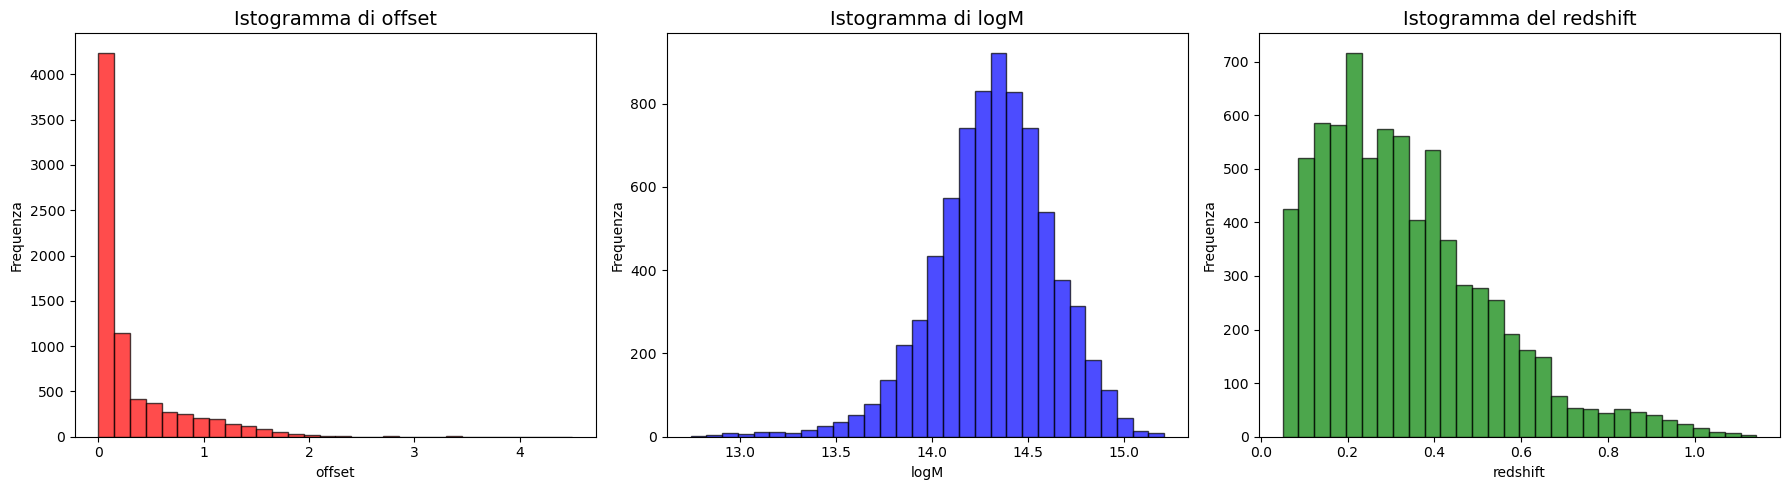

,Statistiche
count,7567.000
mean,0.317
std,0.440
min,0.001
25%,0.048
50%,0.121
75%,0.399
max,4.498
,Statistiche
count,7567.000


In [38]:
#voglio valutare la distribuzione di ogni valore
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) #per plottare le tre distribuzioni una affianco all'altra

# Istogramma dell'offset 
axes[0].hist(offset, bins=30, color='red', edgecolor='black', alpha=0.7)
axes[0].set_title("Istogramma di offset", fontsize=14)
axes[0].set_xlabel("offset")
axes[0].set_ylabel("Frequenza")

# Istogramma di logM 
axes[1].hist(logM, bins=30, color='blue', edgecolor='black', alpha=0.7)
axes[1].set_title("Istogramma di logM", fontsize=14)
axes[1].set_xlabel("logM")
axes[1].set_ylabel("Frequenza")

# Istogramma di redshift
axes[2].hist(z, bins=30, color='green', edgecolor='black', alpha=0.7)
axes[2].set_title("Istogramma del redshift", fontsize=14)
axes[2].set_xlabel("redshift")
axes[2].set_ylabel("Frequenza")
plt.tight_layout()
plt.show()

from IPython.display import HTML # importo il modulo solamente per una presentazione grafica migliore

def make_styled_table(series, title): #definisco funzione che usa la funzione .describe per calcolare 
                                      #valori statistici come var. mean, quartili ecc. 
                                      #e poi restituisce una tabella HTML stilizzata contenente tali valori
    
    return (
        series.describe().to_frame("Statistiche")
        .style.format("{:.3f}")
        .set_caption(title)
        .set_table_styles([
            {"selector": "caption",
             "props": "font-size:16px; font-weight:bold; text-align:left; padding:8px;"},

            {"selector": "th",
             "props": "background:#323232; color:white; padding:8px;"},

            {"selector": "td",
             "props": "padding:8px; border-bottom:1px solid #DDD;"},
        ])
        .to_html()
    )


# Creazione delle tabelle
table_offset = make_styled_table(offset, "Statistiche di offset")
table_logM   = make_styled_table(logM,   "Statistiche di logM")
table_z      = make_styled_table(z,      "Statistiche di redshift")

# HTML per metterle affiancate
html = f"""
<div style="display:flex; gap:100px;">

    <div style="flex:1;">
        {table_offset}
    </div>

    <div style="flex:1;">
        {table_logM}
    </div>

    <div style="flex:1;">
        {table_z}
    </div>

</div>
"""

HTML(html)

### $Distribuzione$ $dei$ $dati$

<div style="">
<p>
$\text{Osserviamo che i valori di offset sono molto concentrati "vicino" lo zero, infatti il 75% del campione }$
$\text{ha un offset misurato minore di 0,399. Tuttavia }$


</p>
</div>

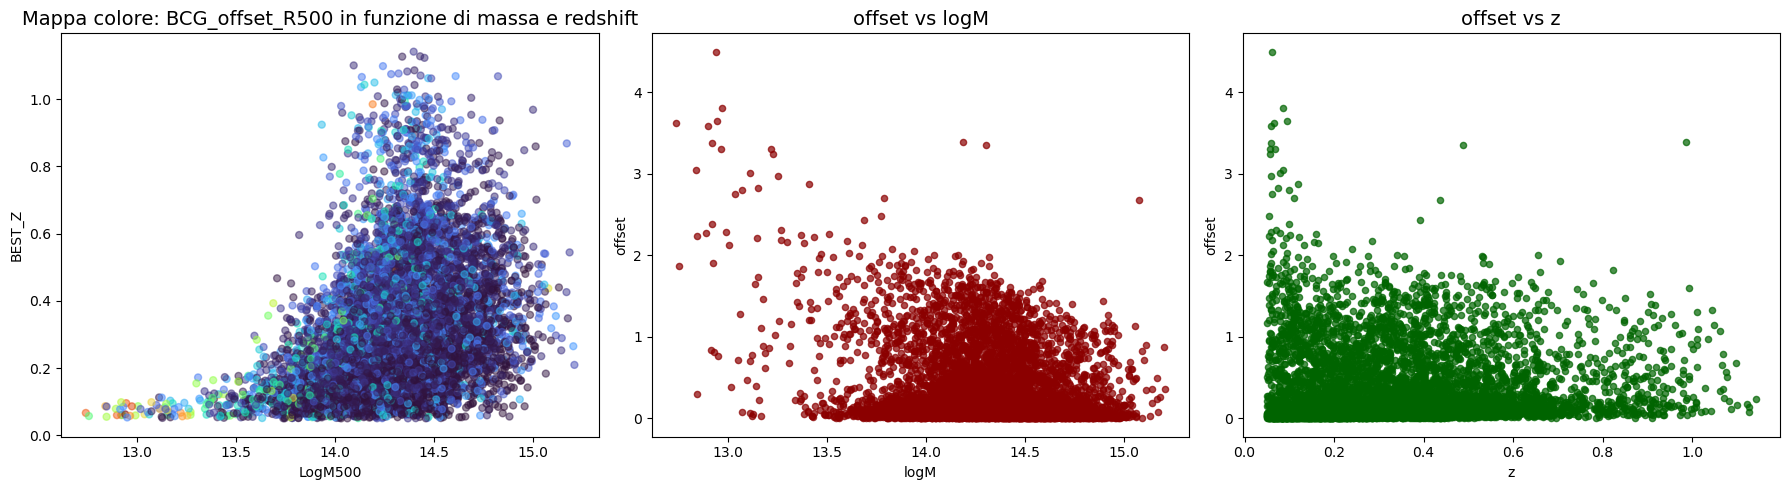

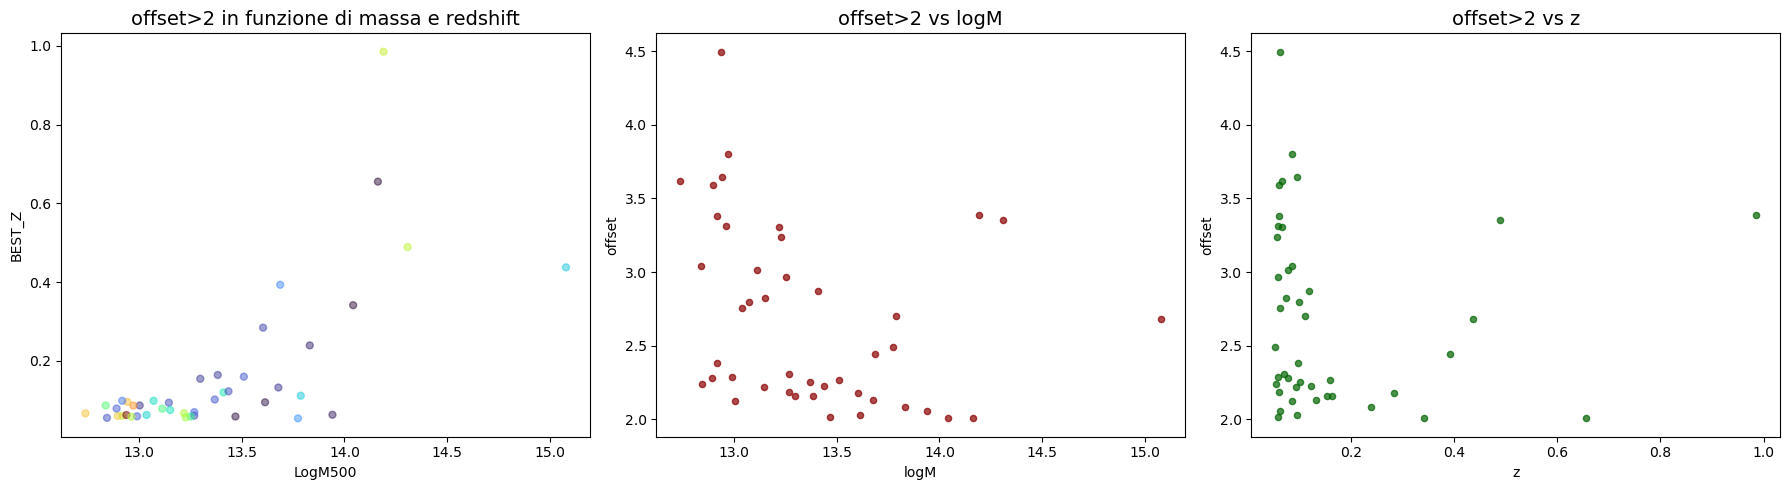

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # sempre per ottenere i plot affiancati

#ora faccio lo scatter plot per valutare la distribuzione dell'offset in funzione di logM e z
# offset vs massa e redshift
axes[0].scatter(logM, z,c=offset,cmap="turbo",s=25,alpha=0.5)
axes[0].set_title("Mappa colore: BCG_offset_R500 in funzione di massa e redshift", fontsize=14)
axes[0].set_xlabel("LogM500")
axes[0].set_ylabel("BEST_Z")

# Scatter plot dell'offset vs logM 
axes[1].scatter(logM, offset,  s=20, alpha=0.7, color='darkred')
axes[1].set_title("offset vs logM", fontsize=14)
axes[1].set_xlabel("logM")
axes[1].set_ylabel("offset")

# Scatter plot dell'offset vs z 
axes[2].scatter(z, offset, s=20, alpha=0.7, color='darkgreen')
axes[2].set_title("offset vs z", fontsize=14)
axes[2].set_xlabel("z")
axes[2].set_ylabel("offset")

plt.tight_layout()
plt.show()

mask = offset >= 2.0 # definisco una mask per filtrare i punti con offset "alto"
new_offset = offset[mask]
new_logM   = logM[mask]
new_z      = z[mask]

#eseguo i plot dei dati "filtrati"
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Scatter plot dell'offset vs LogM e z
axes[0].scatter(new_logM, new_z,c=new_offset,cmap="turbo",s=25,alpha=0.5)
axes[0].set_title("offset>2 in funzione di massa e redshift", fontsize=14)
axes[0].set_xlabel("LogM500")
axes[0].set_ylabel("BEST_Z")

# Scatter plot dell'offset vs logM 
axes[1].scatter(new_logM, new_offset,  s=20, alpha=0.7, color='darkred')
axes[1].set_title("offset>2 vs logM", fontsize=14)
axes[1].set_xlabel("logM")
axes[1].set_ylabel("offset")

# Scatter plot dell'offset vs z 
axes[2].scatter(new_z, new_offset, s=20, alpha=0.7, color='darkgreen')
axes[2].set_title("offset>2 vs z", fontsize=14)
axes[2].set_xlabel("z")
axes[2].set_ylabel("offset")

plt.tight_layout()
plt.show()
